In [1]:
print(__doc__)

# Author: Zehui Li
# Time 2018/11/01

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from tqdm import tqdm
import math

Automatically created module for IPython interactive environment


In [2]:
n_samples = 100
centers = [(2, 2), (-3, -8), (-10, -10),(4, -4)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=3,
                  centers=centers, shuffle=True)
from scipy.spatial.distance import euclidean, pdist, squareform

data = X
def similarity_func(u, v):
    return euclidean(u,v)

DF_var = pd.DataFrame.from_dict(data)
dists = pdist(DF_var, similarity_func)
dist_matric = squareform(dists)

In [3]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer;
from pyclustering.utils import timedcall;
kmedoids_instance = kmedoids(dist_matric, [1,2,3], 0.25,data_type='distance_matrix');
(ticks, result) = timedcall(kmedoids_instance.process);
clusters = kmedoids_instance.get_clusters();
medoids = kmedoids_instance.get_medoids();
def convert_pycluster_to_sklearn(pycluster_input):
    result = np.zeros(len([j for i in pycluster_input for j in i]))
    for i,myInd in np.ndenumerate(pycluster_input):
        result[myInd] = i[0]
    return result

NameError: name 'dist_matrix' is not defined

In [5]:
import random
from math import factorial
# take the similarity matrix, partition result
# and ramdom_seed (which is used to reproduce the experiment)
def perturb_distance_matrix(in_matrix,partition,random_seed):
    matrix = np.matrix.copy(in_matrix)
    #take the index of first,second ... cluster
    partition_list = list()
    for i in np.unique(partition):
        index_i = np.where(partition==i)
        if len(index_i[0])!=1:
            #In one cluster: Randomly select the x pair of points
            temp_upper_bound = factorial(len(index_i[0]))/(factorial(len(index_i[0])-2)*2)
            loop_time = random.randint(1,temp_upper_bound+1)
            #Randomly reduce the distance between each pair
            for j in range(1,loop_time+1):
                pair = np.random.choice(index_i[0],2,False)
                matrix[pair[0],pair[1]]=  matrix[pair[1],pair[0]]= random.uniform(0, 1)*matrix[pair[1],pair[0]]
            #store the partition into the list
        partition_list.append(index_i[0])
    #Ramdonmly select x' pair of clusters
    temp_upper_bound = factorial(len(partition_list))/(factorial(len(partition_list)-2)*2)
    loop_time = random.randint(1,temp_upper_bound+1)
    #increate the distance between clusters with a random ratio
    for i in range(1,loop_time+1):
        cluster_pair = random.sample(partition_list,2)
        #create a ramdom generated matrix - then do elementwise multiplication
        increase_coefficient = np.multiply((np.random.rand(cluster_pair[0].shape[0],cluster_pair[1].shape[0])+1),(np.random.randint(4,size=(cluster_pair[0].shape[0],cluster_pair[1].shape[0]))+1))
        temp_multiplier = np.multiply(matrix[np.ix_(cluster_pair[0],cluster_pair[1])],increase_coefficient)
        matrix[np.ix_(cluster_pair[0],cluster_pair[1])]= temp_multiplier
       # the points are symmetric to each other, so do the corresponding changes
        matrix[np.ix_(cluster_pair[1],cluster_pair[0])] = np.matrix.transpose(temp_multiplier)

    return matrix
def perturb_distance_matrix_random(in_matrix,partition,random_seed):
    matrix = np.matrix.copy(in_matrix)
    #In one cluster: Randomly select the x pair of points
    temp_upper_bound = factorial(len(partition))/(factorial(len(partition)-2)*2)
    loop_time = random.randint(1,temp_upper_bound+1)
    array = np.arange(len(partition))
    #Randomly reduce the distance between each pair
    for j in range(1,loop_time+1):
        pair = np.random.choice(array,2,False)
        matrix[pair[0],pair[1]]=  matrix[pair[1],pair[0]]= random.uniform(0, 1)*random.randint(1,10)*matrix[pair[1],pair[0]]
    return matrix

In [ ]:
asdf.d

In [6]:
from sklearn.cluster import AgglomerativeClustering
def single_linkage_tester(dist_matrix):
    model = AgglomerativeClustering(affinity='precomputed', n_clusters=4, linkage='complete').fit(dist_matrix)
    return model.labels_

In [14]:
iterate_time = 1000*1
check = []
d1 = np.zeros(iterate_time)
d2 = np.zeros(iterate_time)
Gamma3_d3 = np.zeros(iterate_time)
for i in tqdm(range(0,iterate_time)):
    dist_matrix=dist_matric
    partition = single_linkage_tester(dist_matrix)
    dist_matric2 = perturb_distance_matrix(dist_matric,partition,1)
    check.append(dist_matric2-dist_matric)
    partition2 = single_linkage_tester(dist_matric2)
    Gamma3_d3[i]=adjusted_rand_score(partition,partition2)


100%|██████████| 1000/1000 [00:29<00:00, 34.19it/s]


In [16]:
check2 = []
for i in check:
    x = np.matrix(i)
    check2.append(x.sum())

Text(0.5,1,'$\\Gamma$ Transformation (n=1000)')

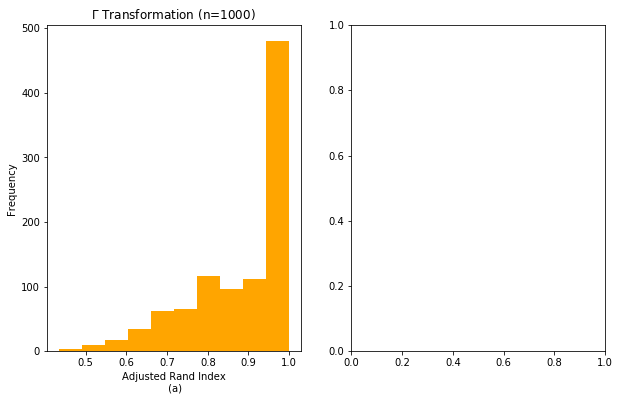

In [8]:
f, axs = plt.subplots(1,2,figsize=(10,6))
plt.subplot(1, 2, 1)
plt.hist(Gamma3_d3,color="orange")
plt.xlabel('Adjusted Rand Index\n (a)')
plt.ylabel('Frequency')
plt.title('$\Gamma$ Transformation (n=1000)')

In [9]:
temp=Gamma3_d3[np.where(Gamma3_d3==1)]
percent  = len(temp)/len(Gamma3_d3)
print(percent)

0.381


In [10]:
def kmediod_tester(dist_matrix):
    kmedoids_instance = kmedoids(dist_matrix, [1,2,3,4], 0.25,data_type='distance_matrix');
    (ticks, result) = timedcall(kmedoids_instance.process);
    clusters = kmedoids_instance.get_clusters();
    return convert_pycluster_to_sklearn(clusters)

In [11]:
iterate_time = 1000
d1 = np.zeros(iterate_time)
d2 = np.zeros(iterate_time)
random_d3 = np.zeros(iterate_time)
for i in tqdm(range(0,iterate_time)):
    dist_matrix=dist_matric
    partition = kmediod_tester(dist_matrix)
    dist_matric2 = perturb_distance_matrix(dist_matric,partition,1)
    partition2 = kmediod_tester(dist_matric2)
    random_d3[i]=adjusted_rand_score(partition,partition2)

100%|██████████| 1000/1000 [00:43<00:00, 22.92it/s]


Text(0.5,1,'$\\Gamma$ Transformation (n=1000)')

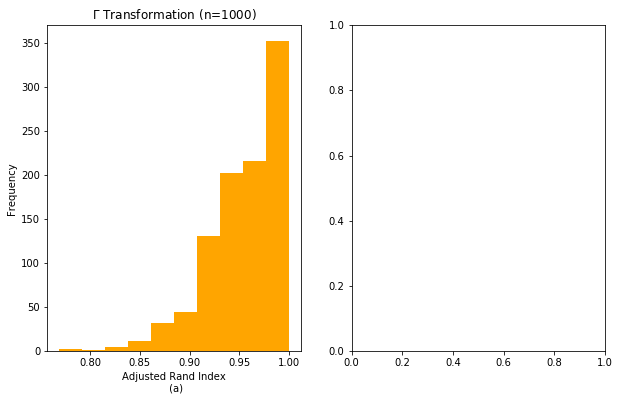

In [12]:
f, axs = plt.subplots(1,2,figsize=(10,6))
plt.subplot(1, 2, 1)
plt.hist(random_d3,color="orange")
plt.xlabel('Adjusted Rand Index\n (a)')
plt.ylabel('Frequency')
plt.title('$\Gamma$ Transformation (n=1000)')

In [13]:
temp=random_d3[np.where(random_d3==1)]
percent  = len(temp)/len(random_d3)
print(percent)

0.228
